In [ ]:
# # to be able to read and add files to your google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# <center><font color=blue>Fuzzy C means Clustering </font>

---



<font size=4>Use the data provided in the file “clustering_assignmentData.csv” where we know that there are three clusters from the labels (K = 3). Apply Fuzzy C-means algorithm on the data provied where each row in the file corresponds to one data point. <br> <br>

Important Notes:  <br>One important aspect of fuzzy c means that changes the results significantly is the initialization. So you should run the fuzzy c-means algorithm with the given initialization below above 100 times. The final output of the clustering is the result that gives the minimum  J ( the objective function in lec 6 slide 13).
One possible startegy for intialization cluster centers is to select the furthest points from each other. 
it's required to try clustering with different q (the fuzziness Index and visualize the results)
</font>


# <center><font color=blue>Solution </font>

<font color=blue size=4>1-Needed Packages

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import math
import pandas as pd
from numpy.random import seed
import sys
ep = sys.float_info.epsilon

<font color=blue size=4>2-Load Data

In [ ]:
def Random_Select(data):
    """
    This Function should implement step 1 in slide 6, Lec 6
    Input: Dataset
    Output: 3-means
    """
    
    #1. Choose First Center randomly 
    m1=data[np.random.randint(len(data))-1,:]
    dist=(np.sum((data-m1)**2,axis=1))**0.5
    #2. select the second one 
    m2=data[np.argmax(dist),:]
    #3. select the third one 
    dist[np.argmax(dist)]=0
    m3=data[np.argmax(dist),:]
   
    
    
    
    return m1,m2,m3 

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)


In [ ]:
def Membership(data,m1,m2,m3, q):
    """
    This function should implement step 2 in slide 15, Lec 6
    Possible values for rnk will be any value between [0,1] 
    Input: Dataset, 3-means, memership matrix, and the fuzziness Index
    Return: New membership matrix with shape (len(data), 3)
    ** hint: the distace between the cluster mean point and itself is zero,
        it will result NANs and INFs in the rnk equation, 
        you can add epsilon to the distaces in you rnk computaions
    """
    rnk = np.zeros((len(data),3))
    rnk_final = np.zeros((len(data),3))
    fuzziness = 1 / (q-1)
    ep = .0001
    for i in range(len(data)):
        constant = 0
        dist1=np.sqrt(np.sum((data[i,:]-m1)**2))
        dist2=np.sqrt(np.sum((data[i,:]-m2)**2))
        dist3=np.sqrt(np.sum((data[i,:]-m3)**2))
        
        if dist1 == 0 :
            dist1 += ep
        elif dist2 == 0:
            dist2 += ep
        elif dist3 == 0:
            dist3 += ep
            
        constant += np.power(1/dist1, fuzziness)
        constant += np.power(1/dist2, fuzziness)
        constant += np.power(1/dist3, fuzziness)

        w1 = np.power((1 / dist1), fuzziness) / constant
        w2 = np.power((1 / dist2), fuzziness) / constant
        w3 = np.power((1 / dist3), fuzziness) / constant
        
        rnk[i][0] = w1
        rnk[i][1] = w2
        rnk[i][2] = w3
    assert rnk.shape == (len(data), 3)

    return rnk

In [ ]:
def Membership(data,m1,m2,m3, q):
    """
    This function should implement step 2 in slide 15, Lec 6
    Possible values for rnk will be any value between [0,1] 
    Input: Dataset, 3-means, memership matrix, and the fuzziness Index
    Return: New membership matrix with shape (len(data), 3)
    ** hint: the distace between the cluster mean point and itself is zero,
        it will result NANs and INFs in the rnk equation, 
        you can add epsilon to the distaces in you rnk computaions
    """
    rnk = np.zeros((len(data),3))
    rnk_final = np.zeros((len(data),3))
    fuzziness = 1 / (q-1)
    ep = .0001
    for i in range(len(data)):
        constant = 0
        dist1=np.sqrt(np.sum((data[i,:]-m1)**2))
        dist2=np.sqrt(np.sum((data[i,:]-m2)**2))
        dist3=np.sqrt(np.sum((data[i,:]-m3)**2))
        
        if dist1 == 0 :
            dist1 += ep
        elif dist2 == 0:
            dist2 += ep
        elif dist3 == 0:
            dist3 += ep
            
        constant += np.power(1/dist1, fuzziness)
        constant += np.power(1/dist2, fuzziness)
        constant += np.power(1/dist3, fuzziness)

        w1 = np.power((1 / dist1), fuzziness) / constant
        w2 = np.power((1 / dist2), fuzziness) / constant
        w3 = np.power((1 / dist3), fuzziness) / constant
        
        rnk[i][0] = w1
        rnk[i][1] = w2
        rnk[i][2] = w3
    assert rnk.shape == (len(data), 3)

    return rnk

In [ ]:
def Update_Means(data,rnk,q):
    """
    This function should implement step 3 in slide 15, Lec 6
    
    Input: Dataset, memership vector, and the fuzzines index
    Return: updated 3-means
    """
    m1 = np.dot(np.power(rnk[:, 0].T, q), data) / np.sum(np.power(rnk[:, 0], q))
    m2 = np.dot(np.power(rnk[:, 1].T, q), data) / np.sum(np.power(rnk[:, 2], q))
    m3 = np.dot(np.power(rnk[:, 2].T, q), data) / np.sum(np.power(rnk[:, 2], q))
    
    
    
    return m1,m2,m3


In [ ]:
def Objective_Function(data,rnk,m1,m2,m3, q):
  d1 = np.power(rnk[:, 0], q) * np.sqrt((data-m1)**2).T
  d2 = np.power(rnk[:, 1], q) * np.sqrt((data-m2)**2).T
  d3 = np.power(rnk[:, 2], q) * np.sqrt((data-m3)**2).T

  Avgdist = np.sum(d1 + d1 + d1)

  return Avgdist


In [ ]:
def StoppingCriteria(m1_b,m2_b,m3_b,m1,m2,m3):
    """
    This function should Test Convergence
    
    Input:  3-means before updating and after it.
    Output: return True or  return False
    """
    m1_b,m2_b,m3_b = np.round(m1_b, 5), np.round(m2_b, 5), np.round(m3_b, 5)
    
    if (np.array_equal(m1,m1_b))  and (np.array_equal(m2,m2_b)) and (np.array_equal(m3,m3_b)):
        return True
    else:
        return False
    
    

        

In [ ]:
"""def Stopping_Criteria(m1_b,m2_b,m3_b,m1,m2,m3):
    """
    This function should Test Convergence
    
    Input:  3-means before updating and after it.
    Return: return True or  return False
    ** hint: unlike this step in the k means algorithm,
            you need to compute the differnce between the old and new means,
            and comapre the difference to a very small threshold, 
            or your can compare after rounding the means to 4 of 5 decimal places.

            
    """
    d1 = np.sum(m1_b - m1)
    d2 = np.sum(m2_b - m2)
    d3 = np.sum(m3_b - m3)
    if (d1 < (.0001 * len(m1)) ) and (d2 < (.0001 * len(m2)) ) and (d3 < (.0001 * len(m3)) ):
      return True
    else: 
      return False
    
    

    
    
    
"""

In [ ]:
#________________________Main Code Statrs here___________________________________
def myFCM(data, q):
        assert q > 1
        m1f,m2f,m3f=np.zeros((2,100)),np.zeros((2,100)),np.zeros((2,100)) # 3 - Means 

        Avgdist=np.zeros((100,))
        counter=0

        while(counter <100):
                if (counter == 25):
                  continue

                print("counter: " + str(counter))
            
                # --------------------Intialization Step 1------------------------------#
                seed(counter)
                m1,m2,m3 = Random_Select(data)

                rnk = np.zeros(len(data)) # Membership Vector

                m1_b = m1
                m2_b = m2
                m3_b = m3
                cc = 0
                while(True):
                    #---------------Step 2 compute rnk-----------------------------------------#

                    rnk = Membership(data,m1,m2,m3, q)

                    assert all(np.round(np.sum(rnk, axis = 1), 2) == np.ones(len(rnk)))

                    #---------------Step 3 update means-----------------------------------------#

                    m1,m2,m3 = Update_Means(data,rnk, q)

                    #---------------Step 4 Test Convergence -----------------------------------------#

                    if Stopping_Criteria(m1_b,m2_b,m3_b,m1,m2,m3):
                         m1f[:,counter],m2f[:,counter],m3f[:,counter] = m1,m2,m3

                         Avgdist[counter] = Objective_Function(data,rnk,m1,m2,m3, q)
                         break


                    m1_b = m1
                    m2_b = m2
                    m3_b = m3

                counter += 1     

        idx = np.argmin(Avgdist)
        m1_ = m1f[:,idx]
        m2_ = m2f[:,idx]
        m3_ = m3f[:,idx]
        rnk_=np.argmax(Membership(data,m1_,m2_,m3_, q), axis = 1)
        return rnk_, m1_, m2_, m3_

In [ ]:
ls

drive/  sample_data/


In [ ]:
# Load Data
df = pd.read_csv('/content/drive/MyDrive/NileUniversity/Master/ML/Fuzzy_C_means_Assignment/clustering_assignmentData.csv')
data = df[['X1', 'X2']].values
y = df['y'].values

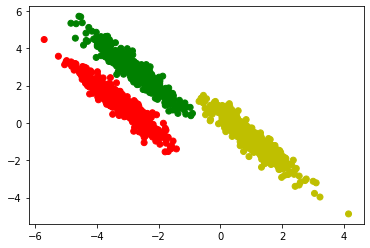

In [ ]:
plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), y)))

# Plotting 

counter: 0
counter: 1
counter: 2
counter: 3
counter: 4
counter: 5
counter: 6
counter: 7
counter: 8
counter: 9
counter: 10
counter: 11
counter: 12
counter: 13
counter: 14
counter: 15
counter: 16
counter: 17
counter: 18
counter: 19
counter: 20
counter: 21
counter: 22
counter: 23
counter: 24
counter: 25
counter: 26
counter: 27
counter: 28
counter: 29
counter: 30
counter: 31
counter: 32
counter: 33
counter: 34
counter: 35
counter: 36
counter: 37
counter: 38
counter: 39
counter: 40
counter: 41
counter: 42
counter: 43
counter: 44
counter: 45
counter: 46
counter: 47
counter: 48
counter: 49
counter: 50
counter: 51
counter: 52
counter: 53
counter: 54
counter: 55
counter: 56
counter: 57
counter: 58
counter: 59
counter: 60
counter: 61
counter: 62
counter: 63
counter: 64
counter: 65
counter: 66
counter: 67
counter: 68
counter: 69
counter: 70
counter: 71
counter: 72
counter: 73
counter: 74
counter: 75
counter: 76
counter: 77
counter: 78
counter: 79
counter: 80
counter: 81
counter: 82
counter: 83
co

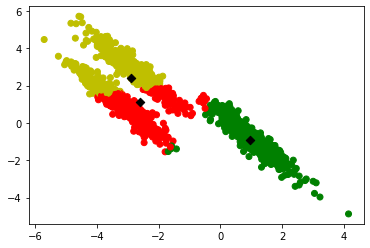

In [ ]:
# Plotting the Final Centroids and data. 
q  =2
rnk_ , m1_, m2_, m3_= myFCM(data, q)
plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), rnk_)))
plt.scatter([m1_[0], m2_[0],m3_[0]],[m1_[1], m2_[1], m3_[1]], marker = 'D', c = 'black')


### Reminging Cells takes longer time and I need to optimize it.

In [ ]:
q = 3
rnk_ , m1_, m2_, m3_= myFCM(data, q)

plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), rnk_)))
plt.scatter([m1_[0], m2_[0],m3_[0]],[m1_[1], m2_[1], m3_[1]], marker = 'D', c = 'black')

counter: 0
counter: 1
counter: 2
counter: 3
counter: 4
counter: 5
counter: 6
counter: 7
counter: 8
counter: 9
counter: 10
counter: 11
counter: 12
counter: 13
counter: 14
counter: 15
counter: 16
counter: 17
counter: 18
counter: 19
counter: 20
counter: 21
counter: 22
counter: 23
counter: 24


In [ ]:

q = 4
rnk_ , m1_, m2_, m3_= myFCM(data, q)

plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), rnk_)))
plt.scatter([m1_[0], m2_[0],m3_[0]],[m1_[1], m2_[1], m3_[1]], marker = 'D', c = 'black')

In [ ]:
q = 5
rnk_ , m1_, m2_, m3_= myFCM(data, q)

plt.scatter(data[:, 0],data[:, 1], color = list(map(lambda x: {0:'r', 1: 'g', 2: 'y'}.get(x), rnk_)))
plt.scatter([m1_[0], m2_[0],m3_[0]],[m1_[1], m2_[1], m3_[1]], marker = 'D', c = 'black')